<br>Siti Zuhairah binti Ramlan (2018629972)</br>
<br>Project DSC761 (15th June 2019)</br>

### Introduction

<br> My dataset is from (https://github.com/chathuHet/RiskPredictionSystem_Dengue)</br>
<br>The dataset is use  from Risk prediction system for dengue transmission based on high resolution weather data in Taiwan.
The data is to demonstrate a risk prediction system using high resolution weather data can provide valuable insight to the distribution of risk over a geographical region. it also shows that a two-stage approach is beneficial in predicting risk in non-homogeneous regions, where the risk is localised. (Hettiarachchige C & et al., 2018)</br>

<br>The first stage is to predict the presence/absence of aeges aegypti larvae (mosquito). This project is to determine the best predictive modelling by using machine learning technique to predict this</br> 

#### Data Unit Description
<br> -Minimum/Maximum/Average temperature-derived from hourly temperature at 2m above the ground across 24 hours (in K) </br>
<br> -Minimum/Maximum/Total precipitation-derived from the hourly sum of sccumulated grid scale precipitation and accumulated cumulus precipitation over 24 hours (in mm) </br>
<br> -Minimum/Maximum/Average relative humidity-derived from the relative humidity at each hour of the day </br>
<br> -Terrain height (column AvgHGT) at the grid point (in meters) </br>

In [1]:
# Data Extraction 
#Example of reading data from csv file using pandas
import pandas as pd
import numpy as np

#define the filename
filename = 'mosdf1.csv'

#define the path
path = 'C:/Users/Owner/Downloads/'+filename

#read the data
mosdf = pd.read_csv(path, sep=',') #can also to separate with tab delimeter, or semicolon ";", etc

#display the data
mosdf.head(10)


,ID,larvae,LarvaeBin,MinTemp,MaxTemp,AvgTemp,MinPrecip,MaxPrecip,TotalPrecip,MinRHumi,MaxRHumi,AvgRHumi,AvgHGT,Con,county
0,1,0,0,284.394348,287.382843,285.998112,0.000888,2.262486e-01,1.064694e+00,80.495796,94.299263,84.265524,195.146668,3.761200,Taipei City
1,2,0,0,281.475738,287.139404,284.106595,0.000000,0.000000e+00,0.000000e+00,71.772133,92.738235,84.057505,869.144653,3.737670,Taitung County
2,3,0,0,283.910492,291.203827,287.919815,0.000000,1.170000e-05,3.320000e-05,67.918205,85.020485,75.904173,228.349930,2.890372,Hualien County
3,4,0,0,285.256561,288.123901,286.739447,0.000000,2.727906e-01,8.313228e-01,76.704300,90.908165,80.590961,113.056297,3.761200,Taipei City
4,5,0,0,284.602203,290.798798,287.258277,0.000000,6.000000e-08,9.000000e-08,62.253326,83.563271,76.501549,440.152679,4.043051,Taitung County
5,6,0,0,284.579529,287.075745,285.756532,0.001928,2.463331e-01,1.242241e+00,80.302986,95.150047,85.059374,216.044052,3.688879,Taipei City
6,7,0,0,286.093994,289.829742,287.629129,0.000000,3.011387e-01,1.853146e+00,65.801056,95.942162,81.794551,131.259781,1.791759,Taipei City
7,8,0,0,287.503448,291.644623,289.630698,0.000000,1.760000e-05,3.230000e-05,70.954575,87.880791,77.742416,357.205078,3.951244,Taitung County
8,9,0,0,288.612274,295.663422,291.822133,0.000034,1.248423e-01,5.770361e-01,66.101929,88.953659,80.260725,239.197815,3.850148,Pingtung County
9,10,0,0,284.348267,292.498352,287.601161,0.000000,0.000000e+00,0.000000e+00,68.431694,95.994003,84.340878,17.353165,3.258097,Tainan City


### Data Visualization

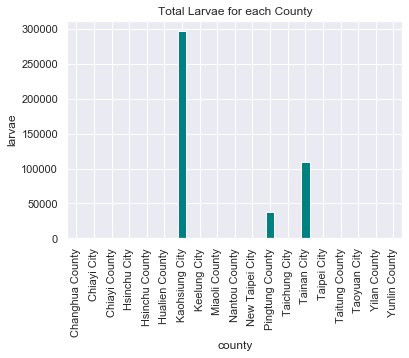

In [4]:
# Bar plot

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

var = mosdf.groupby('county').larvae.sum()
#group total larvae at each of the county

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel ('county')
ax1.set_ylabel ('larvae')
ax1.set_title('Total Larvae for each County')
var.plot (kind='bar',color='teal')

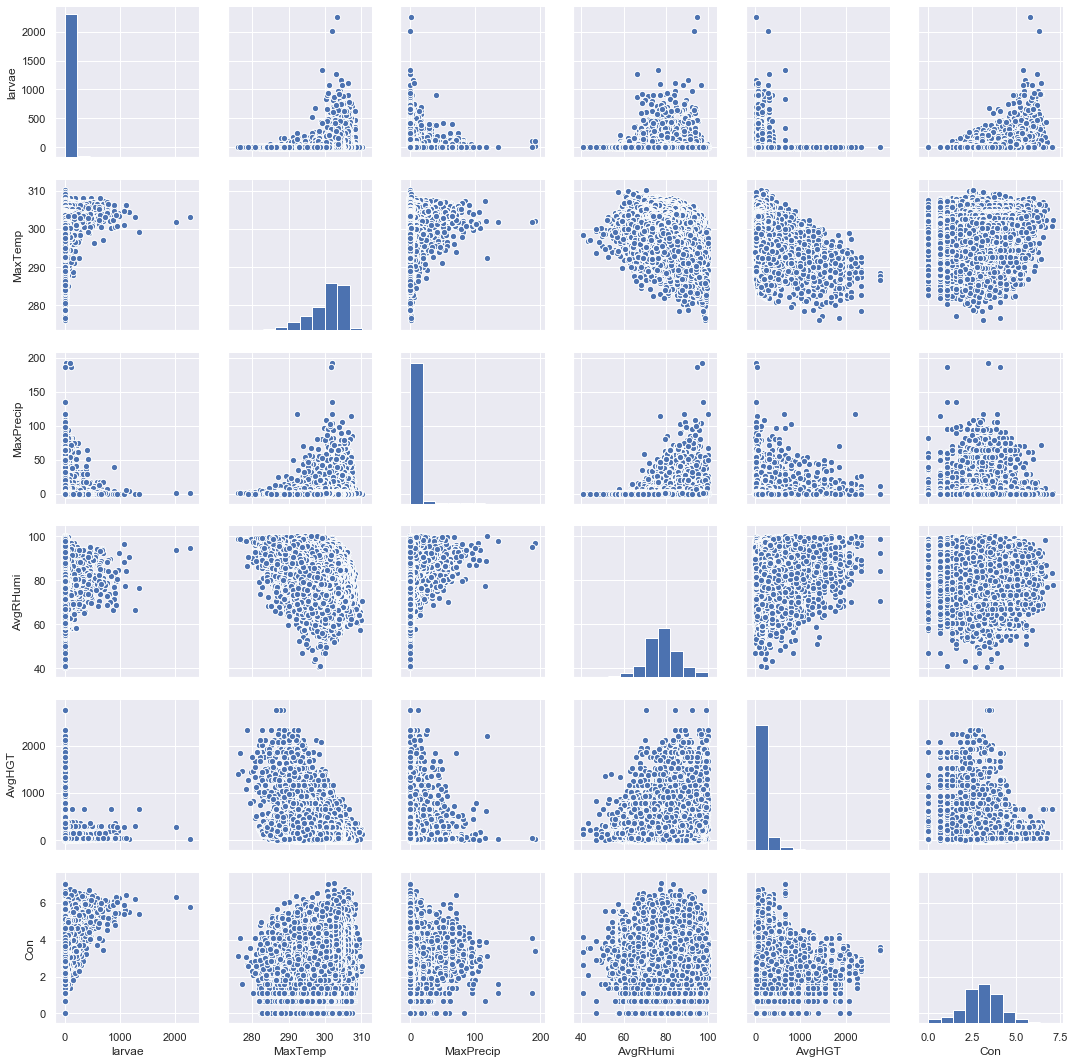

In [5]:
# scatter plot between variable with diagonal histogram

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

g = sns.PairGrid(mosdf,vars=["larvae", "MaxTemp", "MaxPrecip", "AvgRHumi", "AvgHGT", "Con"])
g = g.map_diag(plt.hist, edgecolor="w")
g = g.map_offdiag(plt.scatter, edgecolor="w", s=40)

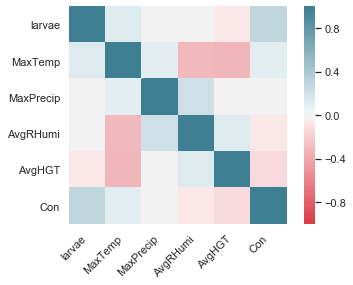

In [6]:
# heatmap

df1 = mosdf.drop(["ID", "LarvaeBin", "MinTemp", "AvgTemp", "MinPrecip", "TotalPrecip","MinRHumi", "MaxRHumi", "county"], axis=1)
df1

corr = df1.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(10, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### Machine Learning Application

<br> In order to predict presence/absence of aeges aegypti larvae (mosquito), this are the variables selection Maximum Temperature, Maximum Precipitation, Average Relative Humidity, Terrain height, Containers to collect the larvae and county in Taiwan Island. </br>
<br> The response variable was defined such that equals 1 if the number of larvae is non-zero and equals 0 otherwise. </br>

### Specify the target and attribute

In [5]:
# select predictor variables (attributes)

X = mosdf[['MaxTemp', 'MaxPrecip', 'AvgRHumi', 'AvgHGT', 'Con', 'county']]
X.head()

,MaxTemp,MaxPrecip,AvgRHumi,AvgHGT,Con,county
0,287.382843,2.262486e-01,84.265524,195.146668,3.761200,Taipei City
1,287.139404,0.000000e+00,84.057505,869.144653,3.737670,Taitung County
2,291.203827,1.170000e-05,75.904173,228.349930,2.890372,Hualien County
3,288.123901,2.727906e-01,80.590961,113.056297,3.761200,Taipei City
4,290.798798,6.000000e-08,76.501549,440.152679,4.043051,Taitung County


In [6]:
# select and specify response variable (target)

Y = mosdf.iloc[:,2]
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: LarvaeBin, dtype: int64

preprocessing the categorical data county to numeric. The county attribute are arrange in alphabetical order and set to number start with 0 as per below:

<br> 0 = Changhua County</br>
 <br> 1 = Chiayi City </br>
  <br> 2 = Chiayi County </br>
        <br> 3 = Hsinchu City </br>
            <br> 4 = Hsinchu County </br>
                <br> 5 = Hualien County </br>
                    <br> 6 = Kaohsiung City </br>
<br> 7 = Keelung City </br>
  <br> 8 = Miaoli County </br>
        <br> 9 = Nantou County </br>
            <br> 10 = New Taipei City </br>
                <br> 11 = Pingtung County </br>
                    <br> 12 = Taichung City </br>
<br> 13 = Tainan City </br> 
<br> 14 = Taipei City </br>
  <br> 15 = Taitung County </br>
        <br> 16 = Taoyuan City </br>
            <br> 17 = Yilan County </br>
                <br> 18 = Yunlin County </br>

In [10]:
import warnings

#import the necessary module
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
X['county'] = le.fit_transform(X['county'])
#display the initial records
X.head()

C:\Users\Owner\Anaconda3.7\envs\DSC761\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,MaxTemp,MaxPrecip,AvgRHumi,AvgHGT,Con,county
0,287.382843,2.262486e-01,84.265524,195.146668,3.761200,14
1,287.139404,0.000000e+00,84.057505,869.144653,3.737670,15
2,291.203827,1.170000e-05,75.904173,228.349930,2.890372,5
3,288.123901,2.727906e-01,80.590961,113.056297,3.761200,14
4,290.798798,6.000000e-08,76.501549,440.152679,4.043051,15


In [8]:
#Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(27826, 6) (27826,)
(11926, 6) (11926,)


### Logistic Regression

Predictive analysis used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

In [9]:
#Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state = 0)
LR.fit(X_train, Y_train)

C:\Users\Owner\Anaconda3.7\envs\DSC761\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
# Predicting the Test set results
y_pred = LR.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [12]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[9344  390]
 [1804  388]]


In [13]:
from pylab import rcParams
import seaborn as sns; sns.set()

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

In [14]:
%matplotlib inline
rcParams['figure.figsize'] =10,6
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")

In [15]:
#to generate model report 
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " ,accuracy_score(y_actual,y_predicted))
    print("Precision = " ,precision_score(y_actual,y_predicted))
    print("Recall = " ,recall_score(y_actual,y_predicted))
    print("F1 Score = " ,f1_score(y_actual,y_predicted))
    pass

In [16]:
# to generate model measurement
generate_model_report(Y_test, y_pred)

Accuracy =  0.816032198557773
Precision =  0.4987146529562982
Recall =  0.177007299270073
F1 Score =  0.2612794612794613


In [17]:
import matplotlib.pyplot as plt

def generate_auc_roc_curve(clf,X_test):
    y_pred_proba = clf.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

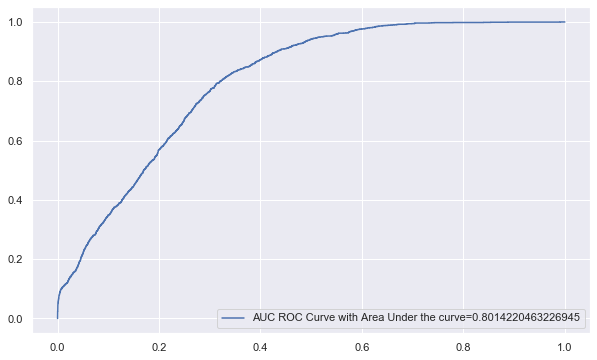

In [18]:
generate_auc_roc_curve(LR,X_test)

### Decision Tree

The most powerful and popular tool for classification and prediction. A Decision tree is a flowchart look like tree structure

In [19]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DT.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [61]:
# Predicting the Test set results
y_pred1 = DT.predict(X_test)
print(y_pred1)

[0 0 0 ... 0 0 0]


In [62]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred1)
print(cm)

[[9002  732]
 [ 858 1334]]


In [23]:
# to generate model measurement
generate_model_report(Y_test, y_pred1)

Accuracy =  0.8663424450779809
Precision =  0.6454280155642024
Recall =  0.6053832116788321
F1 Score =  0.6247645951035782


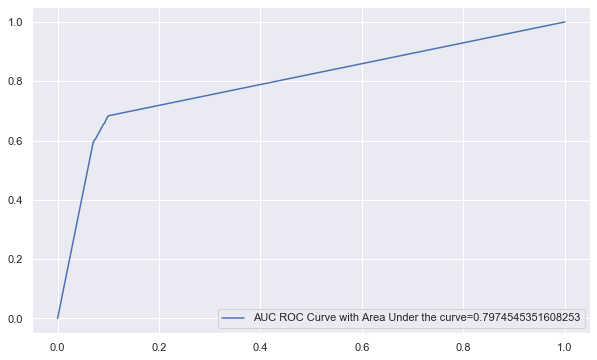

In [26]:
generate_auc_roc_curve(DT,X_test)

### K-Nearest Neighbour (K-NN)

K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions)

In [28]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [29]:
# Predicting the Test set results
y_pred2 = KNN.predict(X_test)
print(y_pred2)

[0 0 0 ... 0 0 0]


In [30]:
# to generate model measurement
generate_model_report(Y_test, y_pred2)

Accuracy =  0.848230756330706
Precision =  0.5980492813141683
Recall =  0.531478102189781
F1 Score =  0.5628019323671496


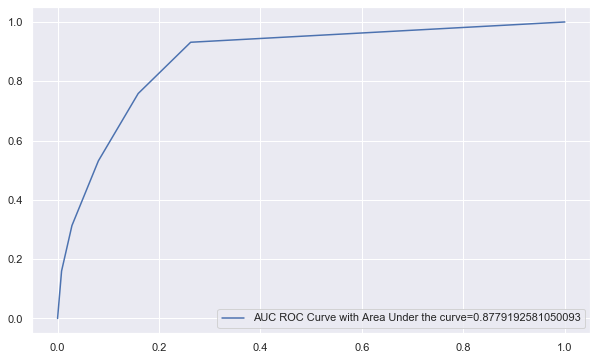

In [31]:
generate_auc_roc_curve(KNN,X_test)

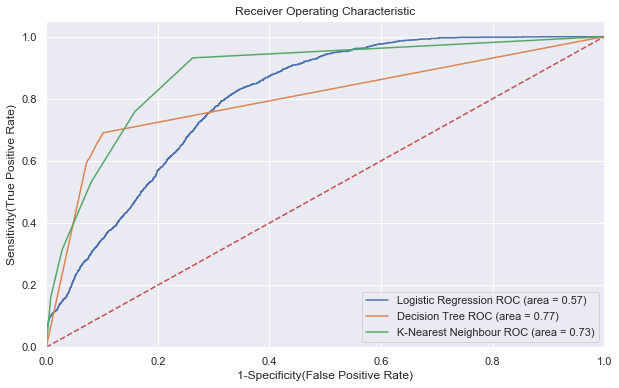

In [36]:
#ROC Model Comparison

from sklearn.metrics import roc_curve
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(),
},
{   'label': 'Decision Tree',
    'model': DecisionTreeClassifier(),
},
{
    'label': 'K-Nearest Neighbour',
    'model': KNeighborsClassifier(),
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, Y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(Y_test,model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

Based from the ROC chart, Decision Tree model is the best and Accuracy is the highest with 86.63% compared to K-NN 82.82% and Logistic Regression 81.60% and Recall 60.54%

In [37]:
# to normalize/standardize (mean = 0 and standard deviation = 1)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

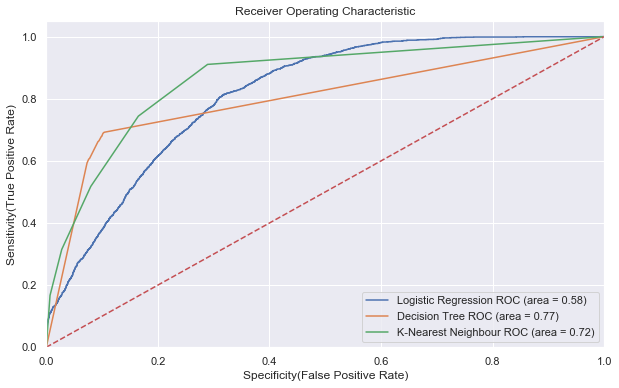

In [38]:
#ROC Model Comparison

from sklearn.metrics import roc_curve
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(),
},
{   'label': 'Decision Tree',
    'model': DecisionTreeClassifier(),
},
{
    'label': 'K-Nearest Neighbour',
    'model': KNeighborsClassifier(),
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, Y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(Y_test,model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

Since some of the predictor variable are positive skewed and negative skewed from the histogram chart, apply standardization to each predictor variables (attribute) to view the performance of modeler. From ROC chart, Decision Tree model still the best model for deployment.